In [3]:
# coding=utf-8

from datetime import datetime, timedelta

import numpy as np
import pandas as pd
from pandas.tseries.offsets import (BDay, Day, CDay)

import alphalens as al

from tumbler.object import BarData, FactorData
from tumbler.constant import Interval
from tumbler.service.mysql_service import MysqlService


select `factor_code`, `symbol`, `datetime`, `val` from `tumbler`.`factor_1day` where factor_code in('BOLL_MIDDLE') and datetime >= '2017-01-01 00:00:00' and datetime <= '2021-10-11 16:50:48.939729'


/usr/local/lib/python3.7/site-packages/tumbler-1.0.1-py3.7-macosx-10.14-x86_64.egg/tumbler/object.py:673: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  price_df[symbol] = np.nan


                     nano_usdt  pnt_usdt  storj_usdt  celo_usdt  stx_usdt  \
2017-08-17 08:00:00        NaN       NaN         NaN        NaN       NaN   
2017-08-18 08:00:00        NaN       NaN         NaN        NaN       NaN   
2017-08-19 08:00:00        NaN       NaN         NaN        NaN       NaN   
2017-08-20 08:00:00        NaN       NaN         NaN        NaN       NaN   
2017-08-21 08:00:00        NaN       NaN         NaN        NaN       NaN   
...                        ...       ...         ...        ...       ...   
2021-08-24 08:00:00     6.3196    1.1480      1.3125     3.0181    1.4175   
2021-08-25 08:00:00     6.7179    1.2192      1.3921     3.0925    1.4831   
2021-08-26 08:00:00     6.2680    1.0723      1.4043     3.5390    1.3610   
2021-08-27 08:00:00     6.6320    1.1386      1.4638     4.1680    1.4295   
2021-08-28 08:00:00     6.5930    1.1271      1.5240     4.4910    1.4140   

                     ltc_usdt  sand_usdt  hard_usdt  xrp_usdt  xvg_usdt  ..

,min,max,mean,std,count,count %
factor_quantile,,,,,,
1,-9.409071,0.263677,-1.402290,0.916063,24858,20.488939
2,-1.262003,0.481313,-0.286362,0.196666,24010,19.789984
3,-0.705628,0.926152,0.115789,0.154885,23920,19.715802
4,-0.223604,1.212177,0.458091,0.164573,24010,19.789984
5,-0.223603,15.264136,1.140214,0.645469,24526,20.215291


Returns Analysis


,1D,5D,10D
Ann. alpha,-0.340,0.479,-0.357
beta,0.036,-0.953,-0.469
Mean Period Wise Return Top Quantile (bps),9.252,12.646,22.459
Mean Period Wise Return Bottom Quantile (bps),35.495,76.745,86.160
Mean Period Wise Spread (bps),-26.243,-33.714,-25.214


<Figure size 432x288 with 0 Axes>

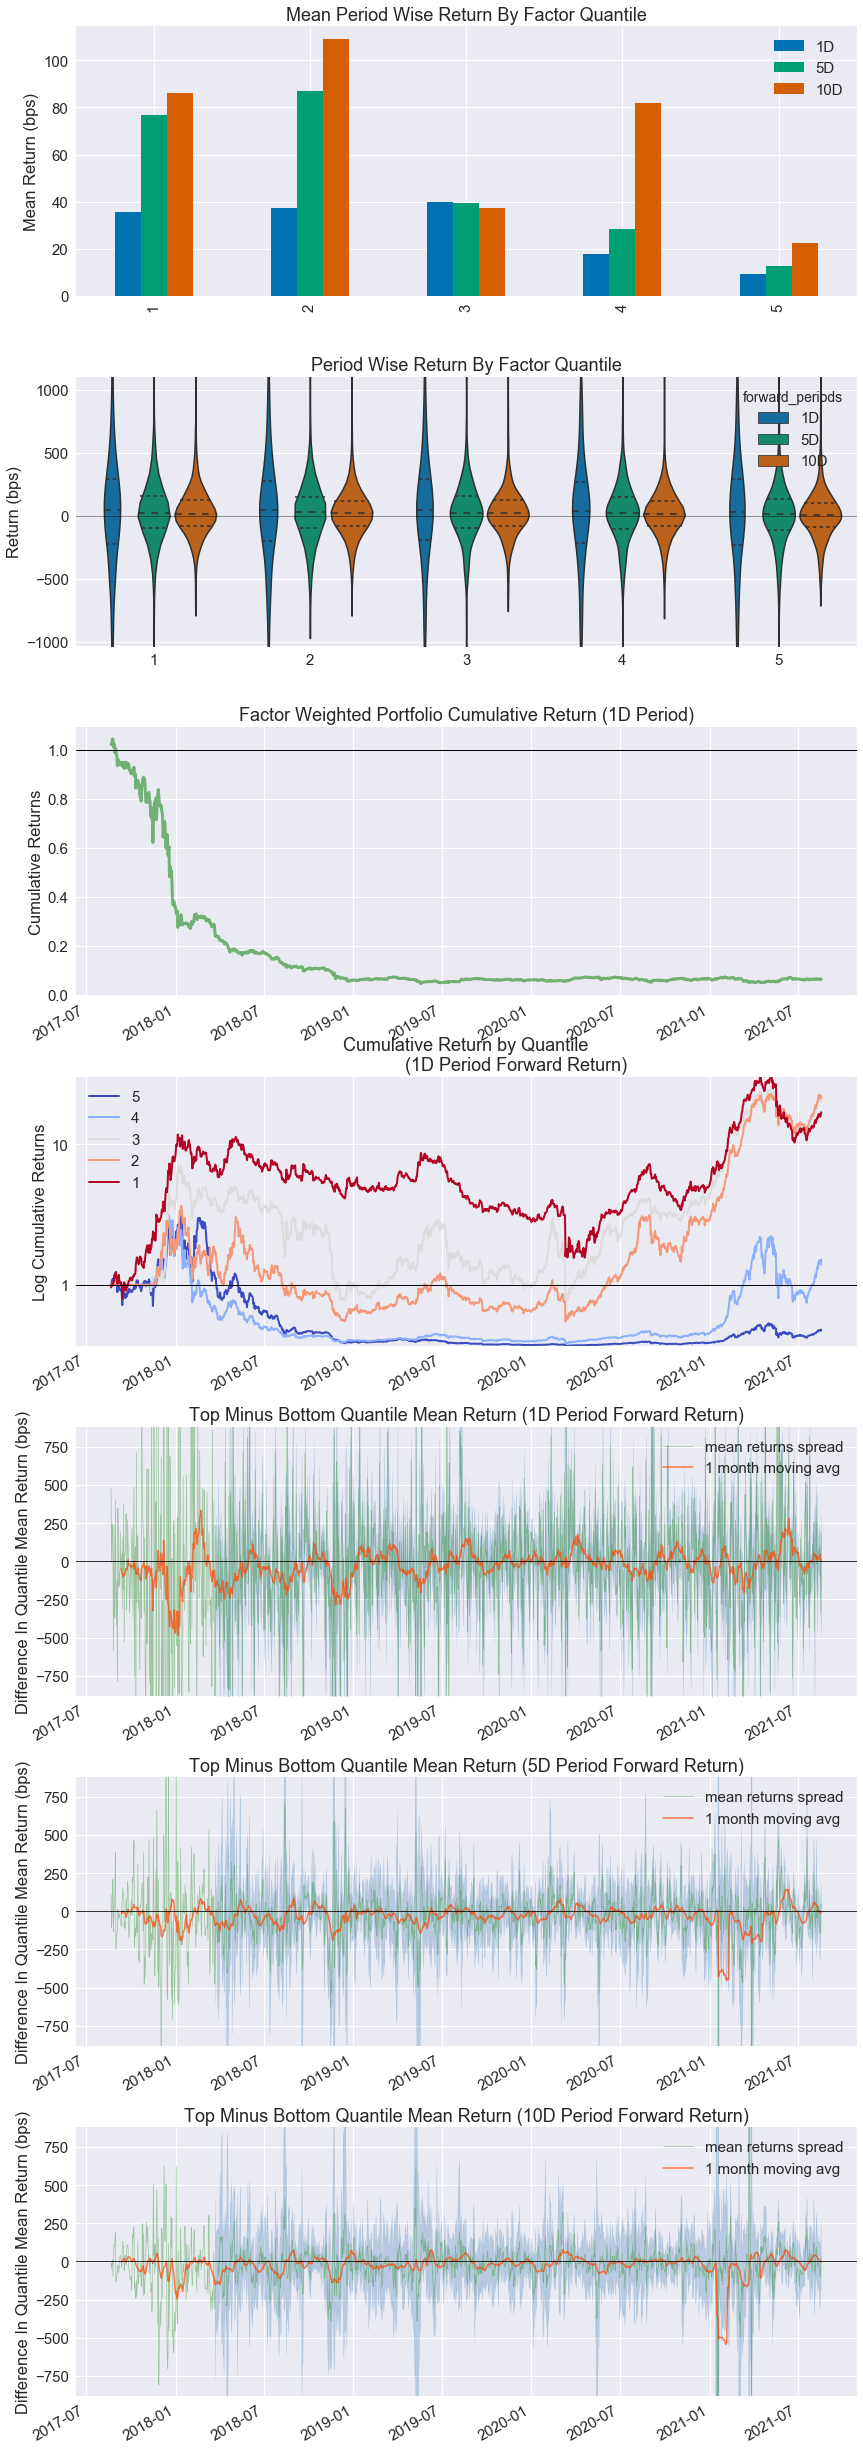

Information Analysis


,1D,5D,10D
IC Mean,0.023,-0.019,-0.024
IC Std.,0.387,0.361,0.366
Risk-Adjusted IC,0.060,-0.051,-0.066
t-stat(IC),2.280,-1.964,-2.508
p-value(IC),0.023,0.050,0.012
IC Skew,-0.264,-0.175,-0.123
IC Kurtosis,1.009,1.636,1.513


/usr/local/lib/python3.7/site-packages/seaborn/distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)
/usr/local/lib/python3.7/site-packages/seaborn/distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)
/usr/local/lib/python3.7/site-packages/seaborn/distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


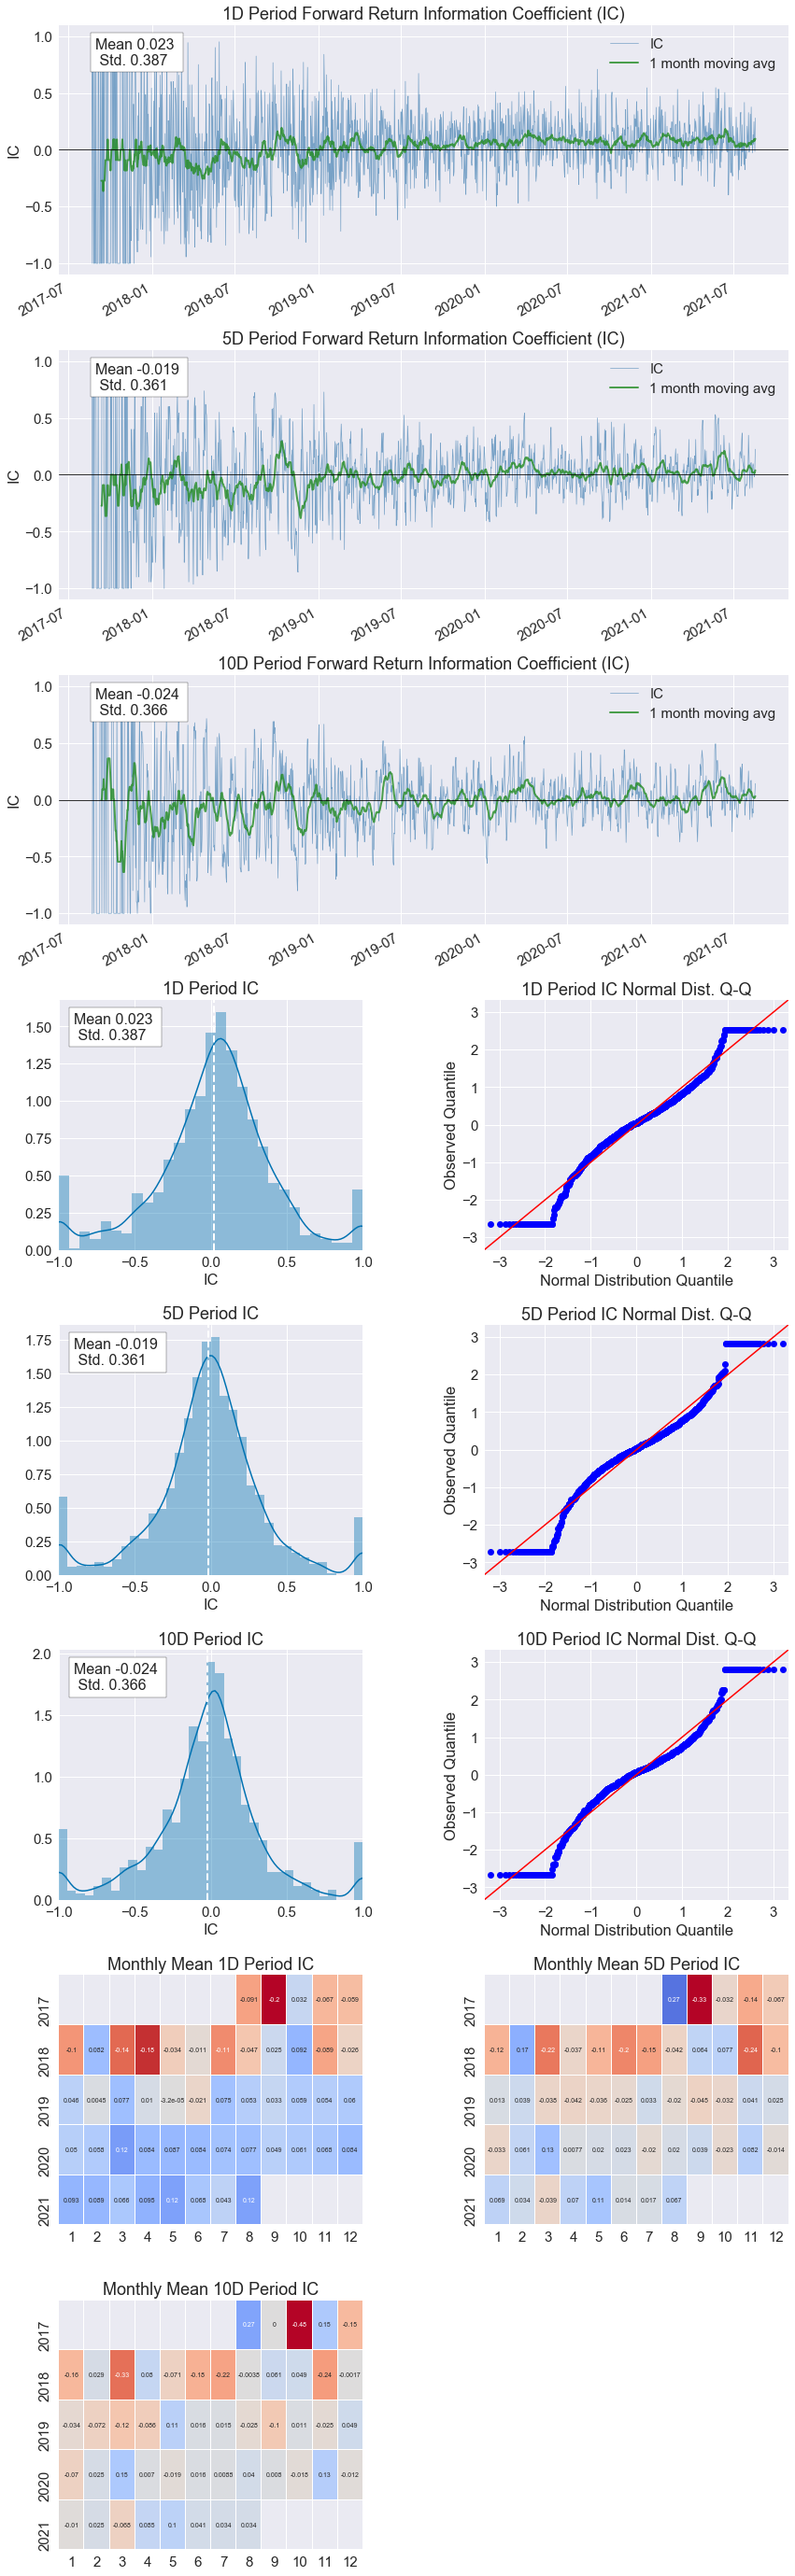

/usr/local/lib/python3.7/site-packages/alphalens-0.4.0+0.g77084f1.dirty-py3.7.egg/alphalens/utils.py:917: UserWarning: Skipping return periods that aren't exact multiples of days.


AttributeError: 'Index' object has no attribute 'get_values'

In [4]:

def create_factor_df_from_mysql():
    mysql_service_manager = MysqlService.get_mysql_service()
    factor_ret = mysql_service_manager.get_factors(
        factor_codes="BOLL_MIDDLE",
        interval=Interval.DAY.value,
        start_dt=datetime(2017, 1, 1),
        end_dt=datetime.now()
    )
    factor_ret = FactorData.suffix_filter(factor_ret, suffix="_usdt")
    factor_df = FactorData.make_alphalen_factor_df(factor_ret, zscore=True)
    return factor_df

factor_df = create_factor_df_from_mysql()
factor_df.tail(50)



def create_price_df_from_mysql():
    mysql_service_manager = MysqlService.get_mysql_service()
    bars_ret = mysql_service_manager.get_bars(
        symbols=[],
        period=Interval.DAY.value,
        start_datetime=datetime(2017, 1, 1),
        end_datetime=datetime.now(),
        sort_way="symbol")
    bars_ret = BarData.suffix_filter(bars_ret, suffix="_usdt")
    price_df = BarData.make_alphalen_price_df(bars_ret)
    price_df = price_df.fillna(method = 'ffill', axis = 0)
    print(price_df)
    return price_df


price_df = create_price_df_from_mysql()
price_df.tail(50)


factor_data = al.utils.get_clean_factor_and_forward_returns(factor_df, price_df, max_loss=0.99)
factor_data.tail(50)


from alphalens.tears import (create_returns_tear_sheet,
                      create_information_tear_sheet,
                      create_turnover_tear_sheet,
                      create_summary_tear_sheet,
                      create_full_tear_sheet,
                      create_event_returns_tear_sheet,
                      create_event_study_tear_sheet)

create_full_tear_sheet(factor_data, long_short=False, group_neutral=False, by_group=False)

In [ ]:
from alphalens.tears import (create_returns_tear_sheet,
                      create_information_tear_sheet,
                      create_turnover_tear_sheet,
                      create_summary_tear_sheet,
                      create_full_tear_sheet,
                      create_event_returns_tear_sheet,
                      create_event_study_tear_sheet)

create_full_tear_sheet(factor_data, long_short=True, group_neutral=False, by_group=False)

In [10]:
arr = factor_df.index.levels[0]
for i in range(len(arr)-1):
    if arr[i] + timedelta(days=1) == arr[i+1]:
        pass
    else:
        print("not ok", arr[i],  arr[i+1])

In [17]:
arr = price_df.index
for i in range(len(arr)-1):
    if arr[i] + timedelta(days=1) == arr[i+1]:
        pass
    else:
        print("not ok", arr[i],  arr[i+1])